# n度定規?

角度が$45^\circ, 90^\circ, 45^\circ$である三角形の三辺の比は$1:1:\sqrt{2}$であるらしい。

角度が$60^\circ, 90^\circ, 30^\circ$である三角形の三辺の比は$1:\sqrt{3}:2$であるらしい。

角度が$75^\circ, 90^\circ, 15^\circ$である三角形の三辺の比は$\sqrt{6} - \sqrt{2}:\sqrt{6} + \sqrt{2}:4$であるらしい。

しかしながら、このようにして根号だけを用いて角度→三辺の比の変換ができるような角度は限られている。

例えば、$\sin 1^\circ$はルートだけを用いて表すことはできない。（多分）

では、どのような条件で根号だけを用いて角度→三辺の比の変換ができるのだろうか？調べてみようと思う。

以下に示す図は、sympyのrewrite関数などを使って$0 \geqq n \geqq 90$の範囲で$\sin n^\circ$を可能な限り根号のある形に変換したものである。

In [1]:
%matplotlib inline

from sympy import *

init_printing()

import math
import numpy

In [45]:
formulas = []

def smpl(x):
    return expand(sqrtdenest(simplify(radsimp(factor(x)))))

# def trig_conv(x):
#     return smpl(trigsimp(x))

def root_only_latex(lx):
    return not ("sin" in lx or "cos" in lx)

def root_only(x):
    return root_only_latex(latex(x))

def trig_conv(x):
    s = smpl(x.rewrite("sqrt"))
    if root_only(s):
        return s
    else:
        return x

for i in range(0, 91):
    formulas.append(trig_conv(sin(i*pi/180)))

In [46]:
import pandas as pd

pd.set_option('display.max_rows', len(formulas))
pd.set_option('max_colwidth', 3000)
df = pd.DataFrame({"$\sin n^\circ$": list(map(lambda x: "$" + latex(x) + "$", formulas))})

In [89]:
import math

def applyfunc(x):
    if root_only_latex(x.iloc[0]):
        l = len(x.iloc[0])
        r = math.floor(240 - l/3)
        g = math.floor(255 - l/10)
        return ['background-color: rgb(' + str(r) + ', ' + str(g) + ', 255)']
    else:
        return ['background-color: #ffefe0']

df.style.apply(applyfunc, axis=1)

この表から考察できることを、述べていきたいと思う。ちなみに、この表では、numpyのrewrite関数で根号のみの形に変換できたものの背景色を青、できなかったものの背景色を赤にしてある。この表を見ると、変換できるものを$X$、変換できず$sin$や$cos$が残ってしまっているものを$Y$とすると、$X→Y→Y→X→Y→Y→X→Y→Y→\cdots$と規則的に並んでいることがわかる。では、$n$が$3$の倍数であれば良いのか？もちろんそうではない。$sin(\frac{360}{17}^\circ)$をrewrite関数を使って簡単にしてみよう。

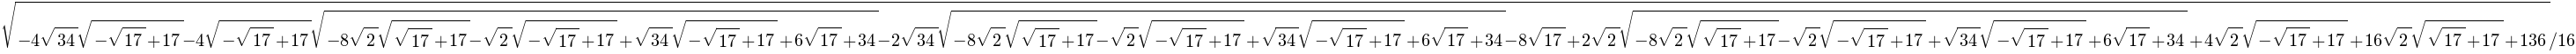

In [90]:
trig_conv(sin(Rational(360, 17)*pi/180))

すると、こんな複雑な式が出てくる。$sin(\frac{360}{17}^\circ)$は弧度法では$sin(\frac{2 \pi}{17})$だが、$\frac{360}{17}^\circ$も$\frac{2 \pi}{17}$も非常に「気持ち悪い」数だと感じる。$17$というのは僕にとってあまり馴染み深い数ではないし、試験問題の答えがこれだったら少し「うげえ」となる。このような数が簡単になるというのは、少し不思議だ。この理由を探ってみよう。

In [131]:
x = Symbol("x")
solve(Eq(factor(x**7 - 1), 0), cubics=True)